<a href="https://colab.research.google.com/github/rimshaharmaen/EDA-Hotel-Booking-Analysis/blob/main/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Almabetter/Hotel Bookings.csv")

In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Car parking required per day
.Room type in demand based on hotel type

In [8]:
df[["reserved_room_type","assigned_room_type"]]

,reserved_room_type,assigned_room_type
0,C,C
1,C,C
2,A,C
3,A,A
4,A,A
...,...,...
119385,A,A
119386,E,E
119387,D,D
119388,A,A


In [9]:
df["reserved_room_type"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [10]:
room_type_demand_df=df.groupby("assigned_room_type")["hotel"].count().reset_index()
room_type_demand_df

,assigned_room_type,hotel
0,A,74053
1,B,2163
2,C,2375
3,D,25322
4,E,7806
5,F,3751
6,G,2553
7,H,712
8,I,363
9,K,279


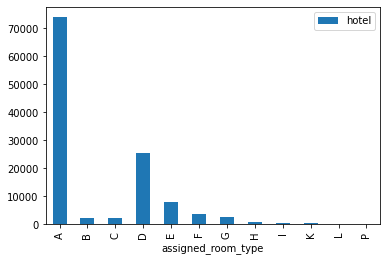

In [11]:
room_type_demand_df.plot(x="assigned_room_type",y=["hotel"],kind="bar")

We  observe that ROOM type A is in demand followed by D and L and P are least preferred 

In [12]:
#df.groupby("reserved_room_type")["arrival_date_month"].count().reset_index()
df.groupby("arrival_date_month")["reserved_room_type"].count().reset_index()

,arrival_date_month,reserved_room_type
0,April,11089
1,August,13877
2,December,6780
3,February,8068
4,January,5929
5,July,12661
6,June,10939
7,March,9794
8,May,11791
9,November,6794


# **In which month which type is in more demand or for each month count of each room type kounsa room type kounse month mein prefer hora ha hai**

does room type gets impacted by month or by agent?lets explore

In [ ]:
list_ofroom_types=list(df["reserved_room_type"].unique())
list_of_months=list(df["arrival_date_month"].unique())
df_of_months=pd.DataFrame(list_of_months)
df_of_months

In [14]:
list_ofroom_types

['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B']

In [15]:
list_of_months

['July',
 'August',
 'September',
 'October',
 'November',
 'December',
 'January',
 'February',
 'March',
 'April',
 'May',
 'June']

In [16]:
df.groupby("arrival_date_month")[""].apply()

KeyError: ignored

In [ ]:
room_type_month_dict={}
count=0
for x in list_of_months:
  df.loc[df["arrival_date_month"]==x]
  ix=df[x].index
  print(ix)
  
  #res=df.iloc[index_x,"reserved_room_type"]

  

if the duration of stay is more then are people opting for booking in advance 


TypeError: ignored

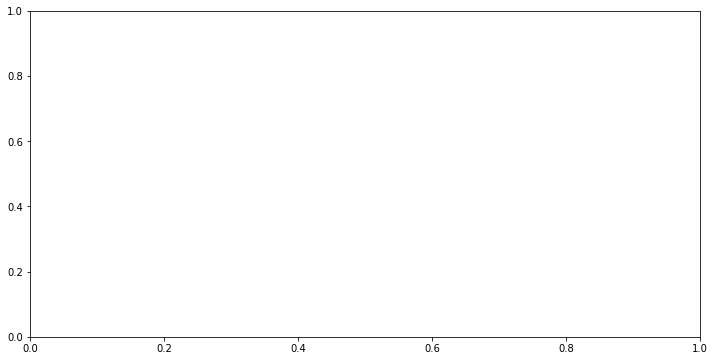

In [17]:
df["stay_duration"]=df['stays_in_weekend_nights']+df['stays_in_week_nights']
plt.figure(figsize = (12,6))
#sns.scatterplot(y = 'lead_time', x = 'stay_duration', data = df)
plt.plot(x='lead_time',y="stay_duration")
plt.show()

WHICH AGENT MADE more booking

In [ ]:
df["agent"].replace(np.NaN,0)

In [36]:
agnt_bookng_count=df['agent'].value_counts().reset_index()
agnt_bookng_count.rename(columns = {'index':'Count'}, inplace = True)

In [37]:
agnt_vs_booking_df=agnt_bookng_count.sort_values(by="Count",ascending = False)
agnt_vs_booking_df

,Count,agent
251,535.0,3
102,531.0,68
141,527.0,35
210,526.0,10
270,510.0,2
...,...,...
39,5.0,330
121,4.0,47
10,3.0,1336
65,2.0,162


In [ ]:
agnt_vs_booking_df

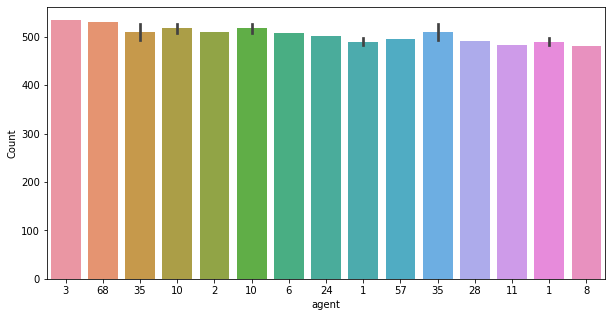

In [38]:
#agnt_vs_booking_df.plot(x="agent",y=["index"],kind="bar")
agnt_vs_booking_df.drop(agnt_vs_booking_df[agnt_vs_booking_df["Count"]==0.0].index,inplace=True)
agnt_vs_booking_df=agnt_vs_booking_df[:15]
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'Count',data = agnt_vs_booking_df, order = agnt_vs_booking_df.sort_values('Count', ascending = False).agent)

In [50]:
list_of_months

['July',
 'August',
 'September',
 'October',
 'November',
 'December',
 'January',
 'February',
 'March',
 'April',
 'May',
 'June']

In [84]:
agent_vs_month=(df
       .groupby(["agent", "arrival_date_month"])
       .size()
       .reset_index()
       .pivot(columns="arrival_date_month", index="agent")
       )
agent_vs_month.replace(np.NaN,0,inplace=True)
agent_vs_month

0                                                   \
arrival_date_month  April  August December February January    July   June   
agent                                                                        
1.0                 339.0  1352.0    257.0    142.0   101.0  1185.0  342.0   
2.0                  45.0    11.0      1.0      9.0     4.0    19.0    9.0   
3.0                 139.0    15.0    120.0     71.0    17.0    14.0  159.0   
4.0                   0.0     0.0      0.0      0.0     0.0     0.0    0.0   
5.0                  12.0    60.0     29.0     12.0     9.0    63.0   47.0   
...                   ...     ...      ...      ...     ...     ...    ...   
510.0                 0.0     0.0      0.0      0.0     2.0     0.0    0.0   
526.0                 3.0     2.0      0.0      0.0     0.0     3.0    1.0   
527.0                35.0     0.0      0.0      0.0     0.0     0.0    0.0   
531.0                 0.0     1.0      0.0      0.0     0.0    32.0   35.0   
535.0                 0.0     0.0      0.0      0.0     0.0     0.0    3.0   

                                                             
arrival_date_month  March    May November October September  
agent                                                        
1.0                 315.0  383.0    235.0   914.0    1626.0  
2.0                   8.0    2.0      4.0    30.0      20.0  
3.0                  39.0  229.0      3.0   304.0     226.0  
4.0                   0.0    0.0      0.0    12.0      35.0  
5.0                   5.0    9.0      1.0    10.0      73.0  
...                   ...    ...      ...     ...       ...  
510.0                 0.0    0.0      0.0     0.0       0.0  
526.0                 0.0    1.0      0.0     0.0       0.0  
527.0                 0.0    0.0      0.0     0.0       0.0  
531.0                 0.0    0.0      0.0     0.0       0.0  
535.0                 0.0    0.0      0.0     0.0       0.0  

[333 rows x 12 columns]